In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def prepare_data(filepath, n_steps, test_size=0.2):
    df = pd.read_csv(filepath)
    scaler = MinMaxScaler(feature_range=(0, 1))
    df['Value'] = scaler.fit_transform(df[['Value']].values.reshape(-1, 1))
    
    split_point = int(len(df) * (1 - test_size))
    train = df.iloc[:split_point]
    test = df.iloc[split_point:]
    
    X_train, y_train = create_sequences(train[['Value']].values, n_steps)
    X_test, y_test = create_sequences(test[['Value']].values, n_steps)
    
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    return X_train, y_train, X_test, y_test, scaler

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, 0])
        y.append(data[i+n_steps, 0])
    return np.array(X), np.array(y)


In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

def build_and_train_model(X_train, y_train, n_steps, learning_rate=0.01, epochs=60):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps, 1)),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return model


In [10]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def predict_and_evaluate(model, X_test, y_test, scaler, y_train, plot=True):
    predictions = model.predict(X_test)
    predictions_inv = scaler.inverse_transform(predictions)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    mae = mean_absolute_error(y_test_inv, predictions_inv)
    
    if plot:
        plot_predictions(y_train, y_test_inv, predictions_inv, scaler)
    
    return mae

def plot_predictions(y_train, actual, predicted, scaler):
    plt.figure(figsize=(10, 6))
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    plt.plot(y_train_inv, label='Training Data', alpha=0.75)
    plt.plot(range(len(y_train_inv), len(y_train_inv) + len(actual)), actual, label='Actual')
    plt.plot(range(len(y_train_inv), len(y_train_inv) + len(predicted)), predicted, label='Predicted')
    plt.title('LSTM Model Predictions vs Actual')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend() 
    plt.show()


1/1 [==============================] - 1s 530ms/step


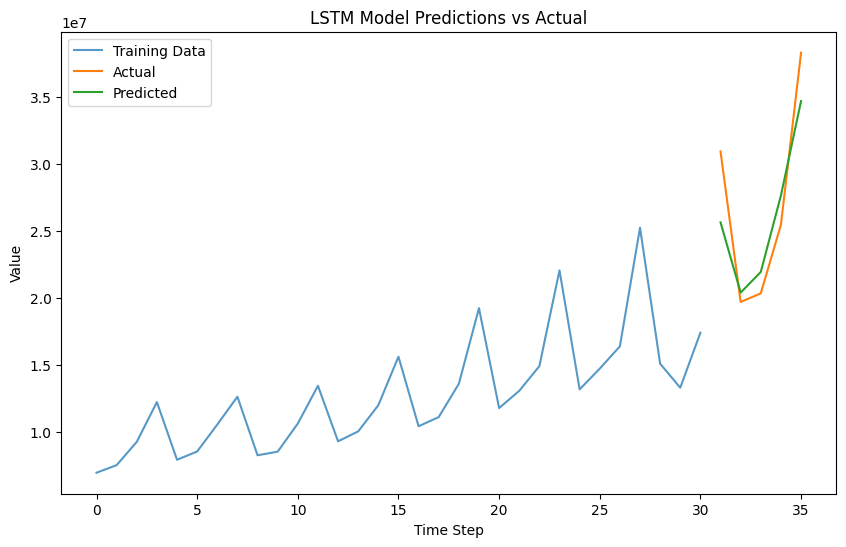

Test MAE: 2674124.5199999986


In [11]:
X_train, y_train, X_test, y_test, scaler = prepare_data('GDP_data.csv', n_steps=4)

model = build_and_train_model(X_train, y_train, n_steps=4)

mae = predict_and_evaluate(model, X_test, y_test, scaler, y_train)
print(f'Test MAE: {mae}')

2/2 [==============================] - 1s 9ms/step


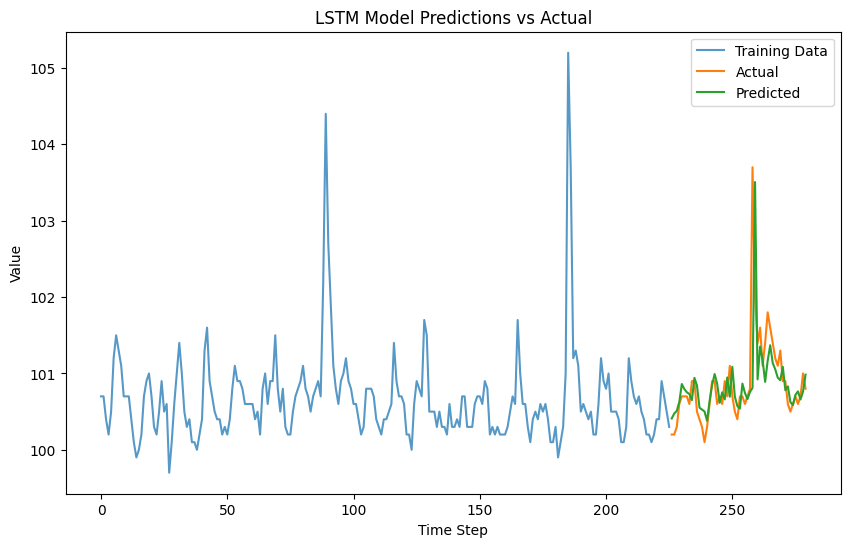

Test MAE: 0.26639172589337423


In [12]:
X_train, y_train, X_test, y_test, scaler = prepare_data('CPI_data.csv', n_steps=4)

model = build_and_train_model(X_train, y_train, n_steps=4)

mae = predict_and_evaluate(model, X_test, y_test, scaler, y_train)
print(f'Test MAE: {mae}')

1/1 [==============================] - 0s 479ms/step


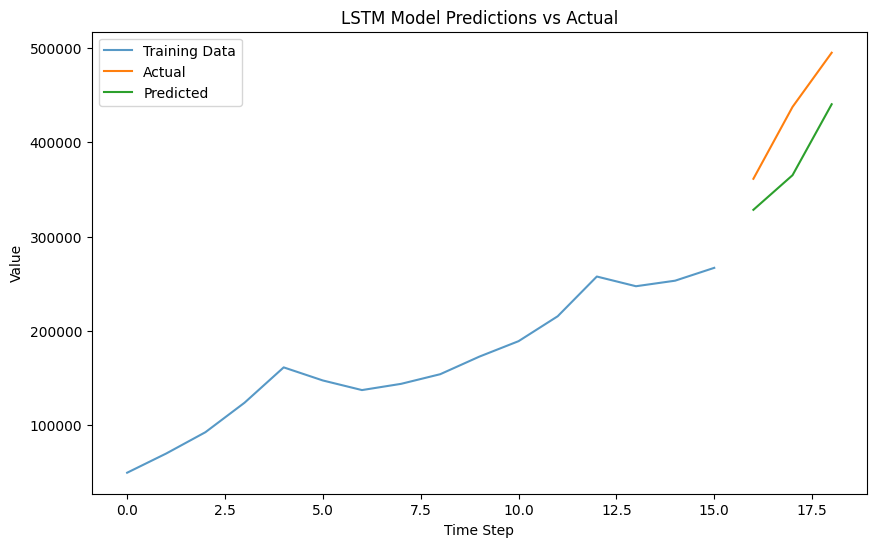

Test MAE: 53302.78125


In [20]:
X_train, y_train, X_test, y_test, scaler = prepare_data('housing_data.csv', n_steps=2)

model = build_and_train_model(X_train, y_train, n_steps=2)

mae = predict_and_evaluate(model, X_test, y_test, scaler, y_train)
print(f'Test MAE: {mae}')

1/1 [==============================] - 0s 430ms/step


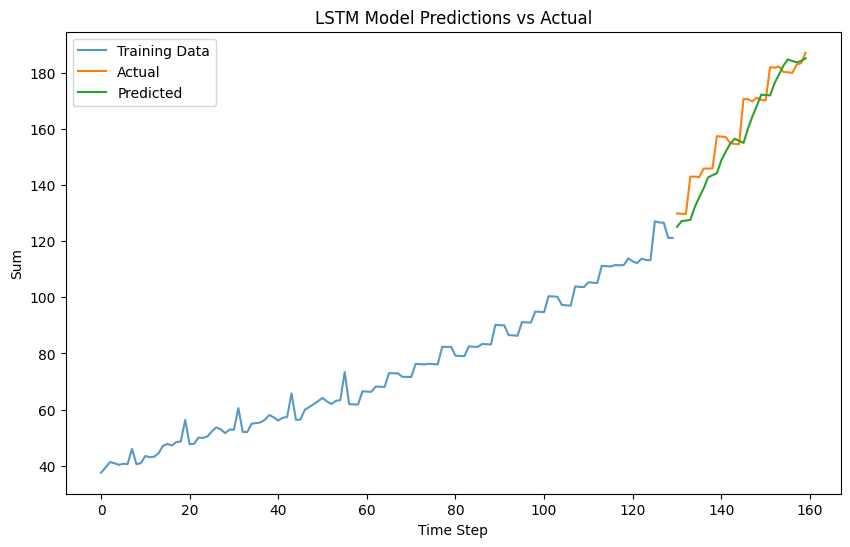

Test MAE: 5.24222657877604


In [9]:
X_train, y_train, X_test, y_test, scaler = prepare_data('income_data.csv', n_steps=4)

model = build_and_train_model(X_train, y_train, n_steps=4)

mae = predict_and_evaluate(model, X_test, y_test, scaler, y_train)
print(f'Test MAE: {mae}')

1/1 [==============================] - 1s 553ms/step


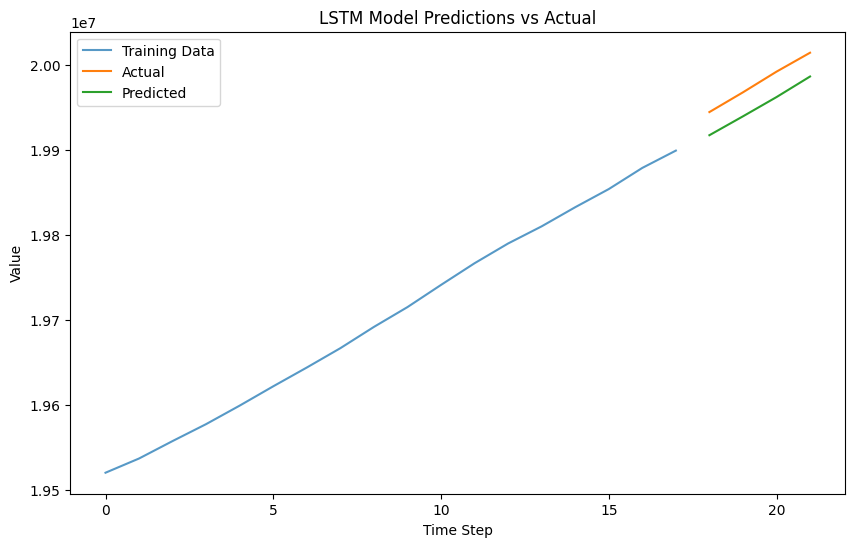

Test MAE: 28357.5


In [22]:
X_train, y_train, X_test, y_test, scaler = prepare_data('population_data.csv', n_steps=1)

model = build_and_train_model(X_train, y_train, n_steps=1)

mae = predict_and_evaluate(model, X_test, y_test, scaler, y_train)
print(f'Test MAE: {mae}')